In [2]:
 import pandas as pd 
data = pd.read_csv(r"C:\Users\hp\Downloads\Financialdata2 (2).csv")

In [3]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


 Fraud data analysiss

Fraud is an important problem that impacts the full economy .currently there is a lack of public research into the detection of fraud and one important reason is a lack of congetional data.which is often sensitive.




The data set includes data about online transactions, some of them
detected as fraud. every transaction contains
 *'step' - maps a unit of time in the real world. In this case 1 step
is 1 hour of time. Total steps 744 (30 days simulation)

 *   type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.
    * CASH-IN is the process of increasing the balance of account by
paying in cash to a merchant
    * CASH-OUT is the opposite process of CASH-IN, it means to
withdraw cash from a merchant which decreases the balance of the
account.
    * DEBIT is a similar process to CASH-OUT and involves sending the
money from the mobile money service to a bank account
    * PAYMENT is the process of paying for goods or services to
merchants which decreases the balance of the account and increases the
balance of the receiver.
    * TRANSFER is the process of sending money to another user of the
service through the mobile money platform.
*   amount - amount of the transaction in local currency.

*   nameOrig - customer who started the transaction.

*   oldbalanceOrg - initial balance before the transaction

*   newbalanceOrig - new balance after the transaction.

*   nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction.

newbalanceDest - new balance recipient after the transaction.Note that
there is no information for senders that start with M (Merchants) as
observed in our analysis.

isFraud - This is the transactions made by the fraudulent agents
inside the simulation. In this specific dataset the fraudulent
behavior of the agents aims to profit by taking control or customers
accounts and try to empty the funds by transferring to another account
and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers
from one account to another and flags illegal attempts. An illegal
attempt in this dataset is an attempt to transfer more than 200000 in
a single transaction.


The goal of the project is to predict the fraudulent transactions


In [4]:
import numpy as np
import pandas as pd

# For preprocessing:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

# Visualization libraries:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#for validating
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_squared_error as mse, auc

#for modeling
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from collections import Counter
import collections
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc
#from lightgbm.sklearn import LGBMClassifier

# For the tree visualization
#from IPython.display import Image
#from io import StringIO

#for scoring
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import log_loss,recall_score, precision_score
from sklearn.metrics import roc_curve, roc_auc_score, accuracy_score

#neural_network
#from sklearn.neural_network import MLPClassifier

# For imbalance data:
from imblearn.under_sampling import RandomUnderSampler

This is a categorical or classification  problem  and we can apply logistic decision tree and random forest model

step 1

check weather the dataset is balanced or not

Step 2

check weather other feature variable impacts the target variable or not

step 3
check for missing values

step 4
encoding

step 5
check for unimportant columns and drop them accordingly.

step 6

check for outliers (boxplots)


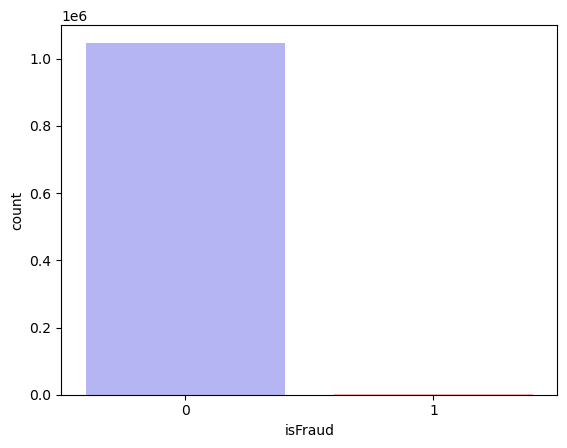

In [5]:
sns.countplot(x="isFraud", data=data, palette="bwr")
plt.show()

In [6]:
countNofraud = len(data[data.isFraud == 0])
countHavefraud = len(data[data.isFraud == 1])

In [7]:
countNofraud

1047433

In [8]:
countHavefraud

1142

In [9]:
print("no fraud %: {:.2f}%".format(countNofraud/ (len(data.isFraud))*100))

no fraud %: 99.89%


In [10]:
print("has fraud %: {:.2f}%".format(countHavefraud/ (len(data.isFraud))*100))

has fraud %: 0.11%


.11% is of the transaction are fraudlent.so clearly it has an imbalanced data.we will apply smote to results te imbalanced data isuue before building the model.

In [11]:
data.isnull().sum()#checking for missing values

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [12]:
data.type.value_counts()#checking for balancing data

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [13]:
#we will do onehot encoding for type column because it is nominal variable and has more than two categorical refered to titanic data

In [15]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

type = data['type']
le = LabelEncoder()
type1 = le.fit_transform(type)

binary = OneHotEncoder(categories='auto')
cols = binary.fit_transform(type1.reshape(-1, 1))
matrix = cols.toarray()

type_data = pd.DataFrame(matrix, columns=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT'])

In [16]:
type_data

,CASH_OUT,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1048570,0.0,1.0,0.0,0.0,0.0
1048571,0.0,0.0,0.0,1.0,0.0
1048572,0.0,0.0,0.0,1.0,0.0
1048573,0.0,0.0,0.0,1.0,0.0


In [17]:
data.columns # checking for unimportant columns and drop them accordingly.

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

<Axes: xlabel='isFraud', ylabel='step'>

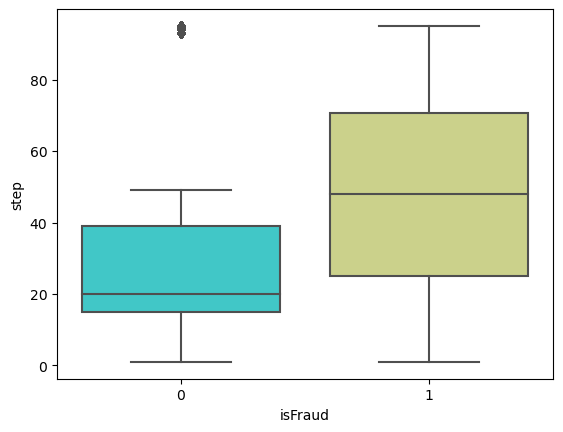

In [18]:
sns.boxplot(x='isFraud',y='step',data=data , palette= 'rainbow')#checking for outliers

In [19]:
y = data.isFraud.values # dependent or target variable
x_data = data.drop(['isFraud'], axis = 1)# independent variable

In [20]:
y

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [21]:
x_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


In [22]:
x_data['sender_receiver_path'] = x_data['nameOrig'].str[:1]+x_data['nameDest'].str[:1]

In [23]:
x_data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,sender_receiver_path
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,CM
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,CM
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,0,CC
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,0,CC
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,CM
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,CC
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,CM
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,CM
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,CM


In [24]:
data1= x_data.drop(['nameOrig', 'nameDest'],axis=1,inplace=True)
x_data.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,sender_receiver_path
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,CM
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,CM
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,CC
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,CC
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,CM


In [25]:
#we will do encoding for type and sender_receiver_path columns ,type-one hot encoding and sender receive path -label encoding.

In [26]:
type = x_data['type']
type1 = le.fit_transform(type)


from sklearn.preprocessing import OneHotEncoder 
binary = OneHotEncoder(categories='auto')
cols = binary.fit_transform(type1.reshape(-1,1))
matrix = cols.toarray()


type_df = pd.DataFrame(matrix , columns = ['CASH_OUT','PAYMENT','CASH_IN','TRANSFER ','DEBIT'])

In [27]:
x_data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [28]:
type_df

,CASH_OUT,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...
1048570,0.0,1.0,0.0,0.0,0.0
1048571,0.0,0.0,0.0,1.0,0.0
1048572,0.0,0.0,0.0,1.0,0.0
1048573,0.0,0.0,0.0,1.0,0.0


In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
sender_receiver_path = x_data['sender_receiver_path']
sender_receiver_path1= le.fit_transform(sender_receiver_path)

In [30]:
sender_receiver_path1

array([1, 1, 0, ..., 1, 1, 1])

In [31]:
sender_receiver_path_df =  pd.DataFrame(sender_receiver_path1 , columns = ['sender'])
sender_receiver_path_df

,sender
0,1
1,1
2,0
3,0
4,1
...,...
1048570,0
1048571,1
1048572,1
1048573,1


In [32]:
x_datanew = pd.concat([x_data ,sender_receiver_path_df ,type_df ] , axis =1 )
x_datanew.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,sender_receiver_path,sender,CASH_OUT,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,CM,1,0.0,0.0,0.0,1.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,CM,1,0.0,0.0,0.0,1.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,CC,0,0.0,0.0,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,CC,0,0.0,1.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,CM,1,0.0,0.0,0.0,1.0,0.0


In [33]:
# drop columns sender_receiver_path and type,CASH_OUT
data1=x_datanew.drop(["sender_receiver_path","type","CASH_OUT"],axis=1,inplace=True)


In [34]:
x_datanew

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,sender,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,1,9839.64,170136.00,160296.36,0.00,0.00,0,1,0.0,0.0,1.0,0.0
1,1,1864.28,21249.00,19384.72,0.00,0.00,0,1,0.0,0.0,1.0,0.0
2,1,181.00,181.00,0.00,0.00,0.00,0,0,0.0,0.0,0.0,1.0
3,1,181.00,181.00,0.00,21182.00,0.00,0,0,1.0,0.0,0.0,0.0
4,1,11668.14,41554.00,29885.86,0.00,0.00,0,1,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,132557.35,479803.00,347245.65,484329.37,616886.72,0,0,1.0,0.0,0.0,0.0
1048571,95,9917.36,90545.00,80627.64,0.00,0.00,0,1,0.0,0.0,1.0,0.0
1048572,95,14140.05,20545.00,6404.95,0.00,0.00,0,1,0.0,0.0,1.0,0.0
1048573,95,10020.05,90605.00,80584.95,0.00,0.00,0,1,0.0,0.0,1.0,0.0


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
from imblearn.over_sampling import SMOTE #generating synthetic samples of the minority class 
#from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [37]:
num_before = dict(Counter(y))
smote = SMOTE()

In [38]:
X_smote, y_smote = smote.fit_resample(x_datanew, y)

In [39]:
#The numbers after SMOTE
num_after =dict(Counter(y_smote))

In [40]:
after_smote=list(num_after.values())
after_smote.reverse()

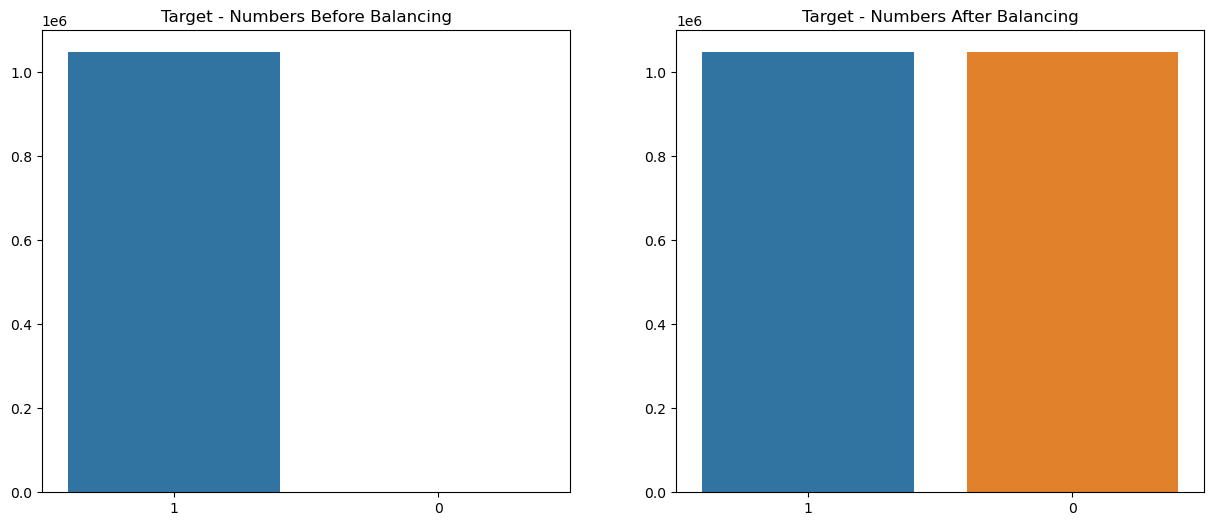

In [41]:
labels = ["1","0"]
labels1 = ["1","0"]
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.barplot(x=labels, y=list(num_before.values()))
plt.title("Target - Numbers Before Balancing")
plt.subplot(1,2,2)
sns.barplot(x=labels, y=after_smote)
plt.title("Target - Numbers After Balancing")
plt.show()

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# Normalize,feature scaling
x = (x_datanew - np.min(x_datanew)) / (np.max(x_datanew) - np.min(x_datanew)).values

C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
C:\Users\hp\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


In [44]:
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,sender,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,0.0,0.000984,0.004374,0.004121,0.000000,0.000000,NaN,1.0,0.0,0.0,1.0,0.0
1,0.0,0.000186,0.000546,0.000498,0.000000,0.000000,NaN,1.0,0.0,0.0,1.0,0.0
2,0.0,0.000018,0.000005,0.000000,0.000000,0.000000,NaN,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000018,0.000005,0.000000,0.000503,0.000000,NaN,0.0,1.0,0.0,0.0,0.0
4,0.0,0.001167,0.001068,0.000768,0.000000,0.000000,NaN,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.0,0.013256,0.012334,0.008927,0.011504,0.014618,NaN,0.0,1.0,0.0,0.0,0.0
1048571,1.0,0.000992,0.002328,0.002073,0.000000,0.000000,NaN,1.0,0.0,0.0,1.0,0.0
1048572,1.0,0.001414,0.000528,0.000165,0.000000,0.000000,NaN,1.0,0.0,0.0,1.0,0.0
1048573,1.0,0.001002,0.002329,0.002072,0.000000,0.000000,NaN,1.0,0.0,0.0,1.0,0.0


In [45]:
x.drop(["isFlaggedFraud"],axis=1,inplace=True)

In [46]:
x

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,sender,PAYMENT,CASH_IN,TRANSFER,DEBIT
0,0.0,0.000984,0.004374,0.004121,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
1,0.0,0.000186,0.000546,0.000498,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
2,0.0,0.000018,0.000005,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0
3,0.0,0.000018,0.000005,0.000000,0.000503,0.000000,0.0,1.0,0.0,0.0,0.0
4,0.0,0.001167,0.001068,0.000768,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,1.0,0.013256,0.012334,0.008927,0.011504,0.014618,0.0,1.0,0.0,0.0,0.0
1048571,1.0,0.000992,0.002328,0.002073,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
1048572,1.0,0.001414,0.000528,0.000165,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0
1048573,1.0,0.001002,0.002329,0.002072,0.000000,0.000000,1.0,0.0,0.0,1.0,0.0


In [47]:
x.isnull().sum()

step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
sender            0
PAYMENT           0
CASH_IN           0
TRANSFER          0
DEBIT             0
dtype: int64

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25,random_state=0)

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
accuracies = {}
lr = LogisticRegression()
lr.fit(x_train,y_train)
acc = lr.score(x_test,y_test)*100

In [51]:
acc

99.90386962890625

In [52]:
dtc = DecisionTreeClassifier()

In [53]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [54]:
acc = dtc.score(x_test, y_test)*100
accuracies['Decision Tree'] = acc
print("Decision Tree Test Accuracy {:.2f}%".format(acc))

Decision Tree Test Accuracy 99.96%


In [55]:
y_head_dtc = dtc.predict(x_test)

In [62]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
acc = rf.score(x_test,y_test)*100
accuracies['Random Forest'] = acc
print("Random Forest Algorithm Accuracy Score : {:.2f}%".format(acc))  

Random Forest Algorithm Accuracy Score : 99.98%


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [68]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy (Random Forest):", accuracy_score(y_test, y_head_dtc))
print("Precision (Random Forest):", precision_score(y_test, y_head_dtc))
print("Recall (Random Forest):", recall_score(y_test, y_head_dtc))

Accuracy (Random Forest): 0.9995994567871094
Precision (Random Forest): 0.8129496402877698
Recall (Random Forest): 0.8100358422939068


In [69]:
#run the above cell and write te implications of precison confusion metrix recall and accuracy for the best model

In [70]:
y_head_dtc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

y_head_rf = rf.predict(x_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Accuracy (Random Forest):", accuracy_score(y_test, y_head_rf))
print("Precision (Random Forest):", precision_score(y_test, y_head_rf))
print("Recall (Random Forest):", recall_score(y_test, y_head_rf))

Accuracy (Random Forest): 0.999755859375
Precision (Random Forest): 0.9694323144104804
Recall (Random Forest): 0.7956989247311828


In [73]:
from sklearn.svm import SVC

In [76]:
svm = SVC(random_state = 1)

In [ ]:
acc = svm.score(x_test,y_test)*100
accuracies['SVM'] = acc